# 1 - Użycie PySpark w celu eksploracji Big Data

1.1 - Konfigurowanie środowiska w Anaconda lub Google Colab

Do wykonywania zadań został wybrany Google Colaboratory

In [88]:
# Polecenie do zainstalowania pakietów pyspark i py4j:

! pip install pyspark==3.0.1 py4j==0.10.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1.2 - Sesja Spark

1.3 - Tworzenie SparkSession

In [89]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
.master("local[*]")\
.appName('PySpark_Tutorial')\
.getOrCreate()

1.4 -  Czytanie danych

In [90]:
csv_file = '/content/IHME_GBD_2019_SMOKING_TOB_1990_2019_NUM_SMOKERS_Y2021M05D27.CSV'
df = spark.read.csv(csv_file)

1.5 - Pobieranie danych za pomocą URL

In [91]:
from pyspark import SparkFiles

spark.sparkContext.addFile('https://storage.covid19datahub.io/level/1.csv')

df = spark.read.csv(SparkFiles.get("1.csv"), header=True)


# 2 - Strukturyzacja danych za pomocą schematu Spark



Kod do odczytu danych w formacie pliku CSV:

In [92]:
data = spark.read.csv(
'/content/IHME_GBD_2019_SMOKING_TOB_1990_2019_NUM_SMOKERS_Y2021M05D27.CSV',
sep=',',
header=True,
)
data.printSchema()


root
 |-- measure_name: string (nullable = true)
 |-- location_id: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- sex_id: string (nullable = true)
 |-- sex_name: string (nullable = true)
 |-- age_group_id: string (nullable = true)
 |-- age_group_name: string (nullable = true)
 |-- year_id: string (nullable = true)
 |-- val: string (nullable = true)
 |-- upper: string (nullable = true)
 |-- lower: string (nullable = true)



Precyzowanie struktury danych

In [93]:
from pyspark.sql.types import *
data_schema = [
                StructField('measure_name', StringType(), True),
                StructField('location_id', IntegerType(), True),
                StructField('location_name', StringType(), True),
                StructField('sex_id', IntegerType(), True),
                StructField('sex_name', StringType(), True),
                StructField('age_group_id', IntegerType(), True),
                StructField('age_group_name', StringType(), True),
                StructField('year_id', IntegerType(), True),
                StructField('val', DoubleType(), True),
                StructField('upper', DoubleType(), True),
                StructField('lower', DoubleType(), True),
                ]

final_struc = StructType(fields = data_schema)
data = spark.read.csv(
      '/content/IHME_GBD_2019_SMOKING_TOB_1990_2019_NUM_SMOKERS_Y2021M05D27.CSV',
      sep=',',
      header=True,
      schema=final_struc
)
data.printSchema()

root
 |-- measure_name: string (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- sex_id: integer (nullable = true)
 |-- sex_name: string (nullable = true)
 |-- age_group_id: integer (nullable = true)
 |-- age_group_name: string (nullable = true)
 |-- year_id: integer (nullable = true)
 |-- val: double (nullable = true)
 |-- upper: double (nullable = true)
 |-- lower: double (nullable = true)



## 3 - Różne metody kontroli danych


schema(): Ta metoda zwraca schemat danych (ramka danych).

In [94]:
data.schema

StructType(List(StructField(measure_name,StringType,true),StructField(location_id,IntegerType,true),StructField(location_name,StringType,true),StructField(sex_id,IntegerType,true),StructField(sex_name,StringType,true),StructField(age_group_id,IntegerType,true),StructField(age_group_name,StringType,true),StructField(year_id,IntegerType,true),StructField(val,DoubleType,true),StructField(upper,DoubleType,true),StructField(lower,DoubleType,true)))

dtypes zwraca listę krotek z nazwami kolumn i typami danych.

In [95]:
data.dtypes


[('measure_name', 'string'),
 ('location_id', 'int'),
 ('location_name', 'string'),
 ('sex_id', 'int'),
 ('sex_name', 'string'),
 ('age_group_id', 'int'),
 ('age_group_name', 'string'),
 ('year_id', 'int'),
 ('val', 'double'),
 ('upper', 'double'),
 ('lower', 'double')]

head(n) zwraca n wierszy jako listę.

In [96]:
data.head(3)

[Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=1, sex_name='Male', age_group_id=29, age_group_name='15+ years', year_id=1990, val=803101467.1, upper=809622101.0, lower=795908635.8),
 Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=2, sex_name='Female', age_group_id=29, age_group_name='15+ years', year_id=1990, val=189148834.0, upper=193092888.7, lower=185559469.9),
 Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=3, sex_name='Both', age_group_id=29, age_group_name='15+ years', year_id=1990, val=992250301.2, upper=1000161258.0, lower=984788043.8)]

show() domyślnie wyświetla pierwsze 20 wierszy, a także przyjmuje liczbę jako parametr
określający ich liczbę

In [97]:
data.show()

+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|     measure_name|location_id|location_name|sex_id|sex_name|age_group_id|age_group_name|year_id|          val|        upper|        lower|
+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|Number of Smokers|          1|       Global|     1|    Male|          29|     15+ years|   1990|8.031014671E8| 8.09622101E8|7.959086358E8|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   1990| 1.89148834E8|1.930928887E8|1.855594699E8|
|Number of Smokers|          1|       Global|     3|    Both|          29|     15+ years|   1990|9.922503012E8|1.000161258E9|9.847880438E8|
|Number of Smokers|          1|       Global|     1|    Male|          29|     15+ years|   1991|8.138972164E8| 8.20033926E8|8.069514479E8|
|Number of Smokers| 

first() zwraca pierwszy wiersz danych.

In [98]:
data.first()

Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=1, sex_name='Male', age_group_id=29, age_group_name='15+ years', year_id=1990, val=803101467.1, upper=809622101.0, lower=795908635.8)

take(n) zwraca pierwsze n wierszy

In [99]:
data.take(5)

[Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=1, sex_name='Male', age_group_id=29, age_group_name='15+ years', year_id=1990, val=803101467.1, upper=809622101.0, lower=795908635.8),
 Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=2, sex_name='Female', age_group_id=29, age_group_name='15+ years', year_id=1990, val=189148834.0, upper=193092888.7, lower=185559469.9),
 Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=3, sex_name='Both', age_group_id=29, age_group_name='15+ years', year_id=1990, val=992250301.2, upper=1000161258.0, lower=984788043.8),
 Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=1, sex_name='Male', age_group_id=29, age_group_name='15+ years', year_id=1991, val=813897216.4, upper=820033926.0, lower=806951447.9),
 Row(measure_name='Number of Smokers', location_id=1, location_name='Global', sex_id=2, sex_name='Female', age_group_

describe() oblicza niektóre wartości statystyczne dla kolumn liczbowych.

In [100]:
data.describe()

DataFrame[summary: string, measure_name: string, location_id: string, location_name: string, sex_id: string, sex_name: string, age_group_id: string, age_group_name: string, year_id: string, val: string, upper: string, lower: string]

columns zwraca listę zawierającą nazwy kolumn.

In [101]:
data.columns 

['measure_name',
 'location_id',
 'location_name',
 'sex_id',
 'sex_name',
 'age_group_id',
 'age_group_name',
 'year_id',
 'val',
 'upper',
 'lower']

count() zwraca całkowitą liczbę wierszy w zestawie danych

In [102]:
data.count()

20970

differ() to liczba odmiennych wierszy w używanym zbiorze danych.

In [103]:
data.differ() 

AttributeError: ignored

printSchema() wyświetla schemat danych.

In [104]:
data.printSchema()

root
 |-- measure_name: string (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- sex_id: integer (nullable = true)
 |-- sex_name: string (nullable = true)
 |-- age_group_id: integer (nullable = true)
 |-- age_group_name: string (nullable = true)
 |-- year_id: integer (nullable = true)
 |-- val: double (nullable = true)
 |-- upper: double (nullable = true)
 |-- lower: double (nullable = true)



# 4 - Manipulacja kolumnami

1 -  Dodawanie kolumny:

In [105]:
data = data.withColumn('location_name_copy', data.location_name)
data.show(5)

+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+------------------+
|     measure_name|location_id|location_name|sex_id|sex_name|age_group_id|age_group_name|year_id|          val|        upper|        lower|location_name_copy|
+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+------------------+
|Number of Smokers|          1|       Global|     1|    Male|          29|     15+ years|   1990|8.031014671E8| 8.09622101E8|7.959086358E8|            Global|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   1990| 1.89148834E8|1.930928887E8|1.855594699E8|            Global|
|Number of Smokers|          1|       Global|     3|    Both|          29|     15+ years|   1990|9.922503012E8|1.000161258E9|9.847880438E8|            Global|
|Number of Smokers|          1|       Global| 

2 - Aktualizacja kolumny:

In [106]:
data = data.withColumnRenamed('location_name_copy', 'location_name_changed')
data.show(5)

+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+---------------------+
|     measure_name|location_id|location_name|sex_id|sex_name|age_group_id|age_group_name|year_id|          val|        upper|        lower|location_name_changed|
+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+---------------------+
|Number of Smokers|          1|       Global|     1|    Male|          29|     15+ years|   1990|8.031014671E8| 8.09622101E8|7.959086358E8|               Global|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   1990| 1.89148834E8|1.930928887E8|1.855594699E8|               Global|
|Number of Smokers|          1|       Global|     3|    Both|          29|     15+ years|   1990|9.922503012E8|1.000161258E9|9.847880438E8|               Global|
|Number of Smokers|         

3 - Upuszczanie kolumny:

In [107]:
data = data.drop('location_name_changed')
data.show(5)


+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|     measure_name|location_id|location_name|sex_id|sex_name|age_group_id|age_group_name|year_id|          val|        upper|        lower|
+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|Number of Smokers|          1|       Global|     1|    Male|          29|     15+ years|   1990|8.031014671E8| 8.09622101E8|7.959086358E8|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   1990| 1.89148834E8|1.930928887E8|1.855594699E8|
|Number of Smokers|          1|       Global|     3|    Both|          29|     15+ years|   1990|9.922503012E8|1.000161258E9|9.847880438E8|
|Number of Smokers|          1|       Global|     1|    Male|          29|     15+ years|   1991|8.138972164E8| 8.20033926E8|8.069514479E8|
|Number of Smokers| 

# 5 - Radzenie sobie z brakującymi wartościami

In [108]:
from pyspark.sql import functions as f
# Usuń wiersze z brakującymi wartościami w dowolnej z kolumn
data.na.drop()
# Zastąp brakujące wartości za pomocą średniej
data.na.fill(data.select(f.mean(data['age_group_id'])).collect()[0][0])
# Zastąp brakujące wartości nowymi
# data.na.replace(old_value, new_vallue)

DataFrame[measure_name: string, location_id: int, location_name: string, sex_id: int, sex_name: string, age_group_id: int, age_group_name: string, year_id: int, val: double, upper: double, lower: double]

# 6 - Pobieranie danych

1 - Select

In [109]:
# wybór jednej kolumny
data.select('year_id').show(5)


+-------+
|year_id|
+-------+
|   1990|
|   1990|
|   1990|
|   1991|
|   1991|
+-------+
only showing top 5 rows



In [110]:
# wybór kilku kolumn
data.select(['location_name', 'sex_name', 'year_id']).show(5)

+-------------+--------+-------+
|location_name|sex_name|year_id|
+-------------+--------+-------+
|       Global|    Male|   1990|
|       Global|  Female|   1990|
|       Global|    Both|   1990|
|       Global|    Male|   1991|
|       Global|  Female|   1991|
+-------------+--------+-------+
only showing top 5 rows



2 - Filter

In [111]:
from pyspark.sql.functions import col
data.filter( (col('year_id') >= 2000) & (col('sex_name') == 'Female') ).show(5)


+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|     measure_name|location_id|location_name|sex_id|sex_name|age_group_id|age_group_name|year_id|          val|        upper|        lower|
+-----------------+-----------+-------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   2000| 2.03389244E8|2.070119921E8|2.000443639E8|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   2001|2.043228487E8|2.078410984E8|2.011225869E8|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   2002|2.051251323E8|2.086136115E8|2.019432714E8|
|Number of Smokers|          1|       Global|     2|  Female|          29|     15+ years|   2003| 2.05852521E8|2.094216076E8|2.026372326E8|
|Number of Smokers| 

3 - Between

In [112]:
data.filter(data.year_id.between(1995, 2000)).show()

+-----------------+-----------+--------------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|     measure_name|location_id|       location_name|sex_id|sex_name|age_group_id|age_group_name|year_id|          val|        upper|        lower|
+-----------------+-----------+--------------------+------+--------+------------+--------------+-------+-------------+-------------+-------------+
|Number of Smokers|          1|              Global|     1|    Male|          29|     15+ years|   1995|8.433043019E8|8.490080491E8|  8.3750097E8|
|Number of Smokers|          1|              Global|     2|  Female|          29|     15+ years|   1995|1.963544335E8|2.002139588E8|1.930128599E8|
|Number of Smokers|          1|              Global|     3|    Both|          29|     15+ years|   1995|1.039658735E9|1.047062623E9|1.032850499E9|
|Number of Smokers|          1|              Global|     1|    Male|          29|     15+ years|   1996|8.478849471E8|

4 - When

In [113]:
data.select('location_name', 'sex_name',
f.when(data.year_id == '2000', 1).otherwise(0)
).show(5)


+-------------+--------+--------------------------------------------+
|location_name|sex_name|CASE WHEN (year_id = 2000) THEN 1 ELSE 0 END|
+-------------+--------+--------------------------------------------+
|       Global|    Male|                                           0|
|       Global|  Female|                                           0|
|       Global|    Both|                                           0|
|       Global|    Male|                                           0|
|       Global|  Female|                                           0|
+-------------+--------+--------------------------------------------+
only showing top 5 rows



5 - Like

In [114]:
data.select('location_name', data.location_name.rlike('^[G,P]').alias('location_name zaczyba sie na litere G lub P')).distinct().show()


+--------------------+-------------------------------------------+
|       location_name|location_name zaczyba sie na litere G lub P|
+--------------------+-------------------------------------------+
|                Cuba|                                      false|
|          Mauritania|                                      false|
|            Djibouti|                                      false|
|            Slovenia|                                      false|
|  Sub-Saharan Africa|                                      false|
|              Malawi|                                      false|
|      United Kingdom|                                      false|
|            Pakistan|                                       true|
|            Botswana|                                      false|
|          Madagascar|                                      false|
|           Australia|                                      false|
|United States of ...|                                      fa

6 - GroupBy

In [115]:
data.select(['val', 'upper', 'lower']).groupBy('val').mean().show()

+-------------+-------------+-------------+------------+
|          val|     avg(val)|   avg(upper)|  avg(lower)|
+-------------+-------------+-------------+------------+
|  134007.9694|  134007.9694|   139677.191| 128260.0995|
|  8270.464532|  8270.464532|  9504.142112| 7096.286328|
|  11829.30213|  11829.30213|  13621.19377| 10115.58969|
|  35698.65734|  35698.65734|   37600.2659| 33870.85627|
|  46355.98657|  46355.98657|   49432.5945| 43154.77478|
|  13869.07463|  13869.07463|  15706.97617| 12179.06027|
|  20742.10263|  20742.10263|  22062.18255| 19357.08588|
|  7423.071697|  7423.071697|  8228.304212|  6694.14611|
|  7448.841156|  7448.841156|  8213.962619| 6706.265256|
|  9104.794872|  9104.794872|  10096.50032| 8162.279112|
|  2887.470373|  2887.470373|  3818.180825| 2189.147345|
|  4744.936929|  4744.936929|   5932.17345| 3729.904017|
|  458.0840221|  458.0840221|  606.3972438| 344.4231654|
|  3185.522508|  3185.522508|  3507.963054|  2861.54479|
|  3986.842432|  3986.842432|  

7 - Agregacja

In [116]:
from pyspark.sql import functions as f

data.filter((col('val') >= 1000000) & (col('val') <= 5000000))\
.groupBy("location_name") \
.agg(f.min("val").alias("from"),
f.max("val").alias("to"),
f.min("val").alias("minimum vaccinated"),
f.max("val").alias("maximum vaccinated"),
f.avg("val").alias("average vaccinated"),
f.min("val").alias("minimum␣economic_support_index"),
f.max("val").alias("maximum␣_economic_support_index"),
f.avg("val").alias("average␣_economic_support_index"),
).show(truncate=False)


+-----------------+-----------+-----------+------------------+------------------+------------------+------------------------------+-------------------------------+-------------------------------+
|location_name    |from       |to         |minimum vaccinated|maximum vaccinated|average vaccinated|minimum␣economic_support_index|maximum␣_economic_support_index|average␣_economic_support_index|
+-----------------+-----------+-----------+------------------+------------------+------------------+------------------------------+-------------------------------+-------------------------------+
|Côte d'Ivoire    |1023886.493|2165483.532|1023886.493       |2165483.532       |1601788.6232857148|1023886.493                   |2165483.532                    |1601788.6232857148             |
|Yemen            |1030535.291|3657898.202|1030535.291       |3657898.202       |1993066.6792333333|1030535.291                   |3657898.202                    |1993066.6792333333             |
|Sweden           |1

# 7 - wizualizacja danych 

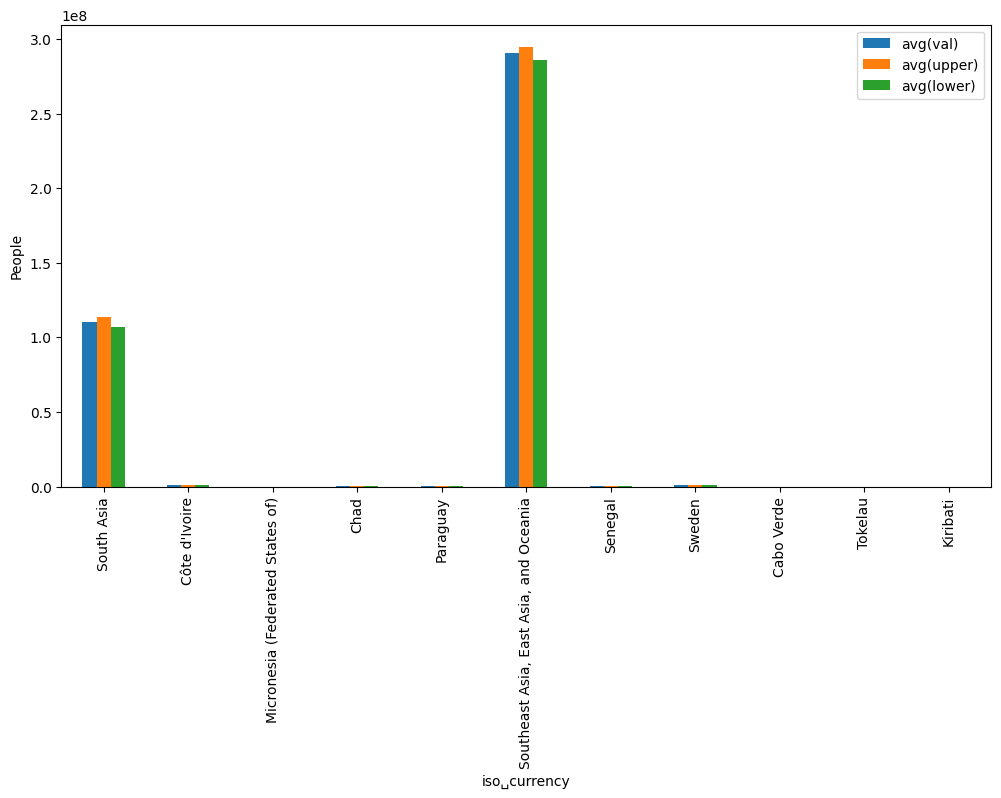

In [117]:
from matplotlib import pyplot as plt

currency_df = data.select(['location_name',
'val',
'upper',
'lower']
)\
.groupBy('location_name')\
.mean()\
.toPandas()
ind = list(range(12))
ind.pop(6)
currency_df.iloc[ind ,:].plot(kind='bar', x='location_name', y=currency_df.columns.tolist()[1:],
figsize=(12, 6), ylabel='People', xlabel='iso␣currency')
plt.show()


# 8 - Zapisywanie/zapisywanie danych do pliku

In [ ]:
# CSV
data.write.csv('dataset.csv')
# JSON
data.write.save('dataset.json', format='json')
# Parquet
data.write.save('dataset.parquet', format='parquet')


In [ ]:
# Zapisywanie wybranych kolumn
# CSV
data.select(['location_name','sex_name','year_id','val'])\
.write.csv('dataset_columns.csv')
# JSON
data.select(['location_name','sex_name','year_id','val'])\
.write.save('dataset_columns.json', format='json')
# Parquet
data.select(['location_name','sex_name','year_id','val'])\
.write.save('dataset_columns.parquet', format='parquet')